![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">
   
<div style="text-align: center;">
    <img src="https://user-images.githubusercontent.com/7065401/76784111-d46c2f00-6791-11ea-8c65-39d7a7c9d8c0.jpg" style="max-width: 600px; width:100%;" />
</div>

## PART 3
# Analyzing the epidemiological outbreak of COVID‐19

Now we'll try to predict confirmed cases per country using regression techniques.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import theme

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data loading and wrangling

We will load COVID-19 data from the [GitHub data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

As we already known the data, we'll go faster now:

In [2]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

In [3]:
print(covid_confirmed.shape)

(274, 416)


In [4]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21
0,NaN,Afghanistan,33.939,67.710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,10001,10585,11176,11834,12459,13039,13662,14528,15208,15753,16512,17270,18057,18972,19554,20345,20920,21462,22146,22894,23550,24106,24770,25531,26314,26878,27536,27882,28428,28837,29147,29471,29705,30165,30441,30606,30957,31228,31507,31826,32012,32314,32662,3

First convert all the data to long format:

In [5]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

In [6]:
covid_confirmed_long.shape

(112888, 6)

In [7]:
covid_confirmed_long.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.939,67.710,1/22/20,0
1,NaN,Albania,41.153,20.168,1/22/20,0
2,NaN,Algeria,28.034,1.660,1/22/20,0
3,NaN,Andorra,42.506,1.522,1/22/20,0
4,NaN,Angola,-11.203,17.874,1/22/20,0


In [8]:
covid_confirmed_long['confirmed'] /= 1_000_000

---
### Data cleaning

As we did before replace `Mainland china` with just `China`, and fill some missing values.

In [9]:
covid_confirmed_long['Country/Region'].replace('Mainland China', 'China', inplace=True)

In [10]:
covid_confirmed_long[['Province/State']] = covid_confirmed_long[['Province/State']].fillna('')

In [11]:
covid_confirmed_long.fillna(0, inplace=True)

Final checks:

In [12]:
covid_confirmed_long.isna().sum().sum()

0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Country analysis over the time

Now we'll aggregate values by `Country/Region` and `date`.

> Hint! the `sort=False` parameter will keep our dates ordered.

Also, remove unused columns.

In [13]:
covid_countries_date_df = covid_confirmed_long.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()

covid_countries_date_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [14]:
covid_countries_date_df

,Country/Region,date,confirmed
0,Afghanistan,1/22/20,0.000
1,Albania,1/22/20,0.000
2,Algeria,1/22/20,0.000
3,Andorra,1/22/20,0.000
4,Angola,1/22/20,0.000
...,...,...,...
79099,Vietnam,3/8/21,0.003
79100,West Bank and Gaza,3/8/21,0.199
79101,Yemen,3/8/21,0.003
79102,Zambia,3/8/21,0.083


Now just filter the daily data from the country you want to analyze:

In [15]:
COUNTRY = 'US'

In [16]:
covid_country = covid_countries_date_df[covid_countries_date_df['Country/Region'] == COUNTRY]

covid_country.head()

,Country/Region,date,confirmed
178,US,1/22/20,0.000
370,US,1/23/20,0.000
562,US,1/24/20,0.000
754,US,1/25/20,0.000
946,US,1/26/20,0.000


And create a `days` list with the amount of days since 1/22 for each day.

In [17]:
days = np.array([i for i in range(len(covid_country['date']))])

days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Let's create a plot showing confirmed cases with our country data:

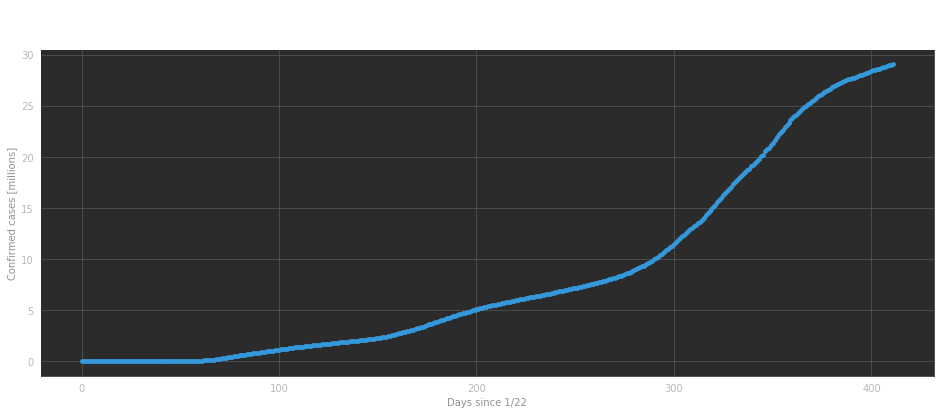

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=4, marker="o",
             sort=False, linewidth=1, color="#3498db")

plt.suptitle(f"COVID-19 confirmed cases in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases [millions]')
plt.xlabel('Days since 1/22')

plt.show()

Show the same plot using a logarithmic scale to see if we got a more linear shape.

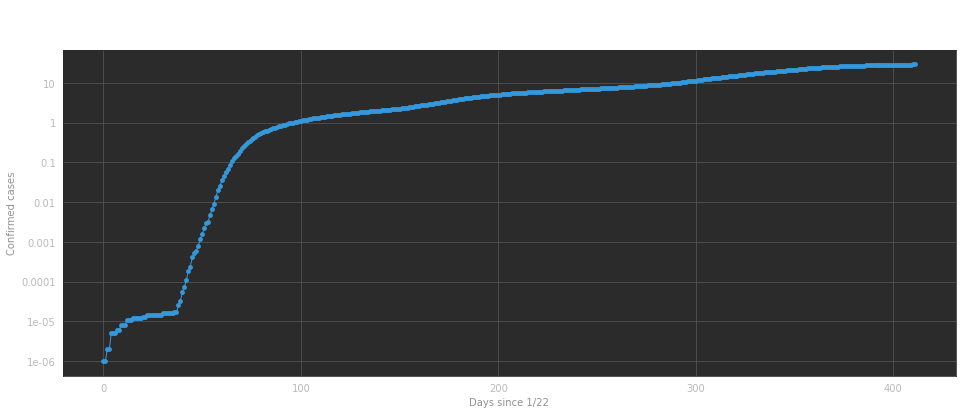

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=4, marker="o",
             sort=False, linewidth=1, color="#3498db")

plt.suptitle(f"COVID-19 confirmed cases in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.show()

As the cases have grown with more volume in the last weeks, we won't use the first 30 values (first ~4 weeks).

In [20]:
SKIP_DAYS = 90

In [21]:
covid_country_confirmed_sm = list(covid_country['confirmed'][SKIP_DAYS:])

covid_country_confirmed_sm[:15]

[0.825429,
 0.854288,
 0.887858,
 0.920185,
 0.95058,
 0.977081,
 1.000784,
 1.025361,
 1.051799,
 1.081019,
 1.115945,
 1.143295,
 1.167592,
 1.191677,
 1.216208]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data representation

We'll be using [scikit-learn](https://scikit-learn.org/) as tool for our predictive analysis.

Let's define `X` features and `y` labels:

In [22]:
X = days[SKIP_DAYS:].reshape(-1, 1)

X[:20]

array([[ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
       [101],
       [102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109]])

In [23]:
y = list(np.log(covid_country_confirmed_sm))

y[:20]

[-0.19185202780060504,
 -0.15748690551106798,
 -0.11894345868682969,
 -0.08318054219780135,
 -0.05068295436713059,
 -0.02318572351821018,
 0.000783692832535606,
 0.02504474570617914,
 0.050502031421561365,
 0.07790411482083337,
 0.10970157959054276,
 0.13391444425088003,
 0.15494350831282194,
 0.17536155876893694,
 0.19573782154772085,
 0.21572973678183804,
 0.2375820132443127,
 0.25852382247846484,
 0.27774763897224886,
 0.2919380031172777]

---
### Train and Test split

Now that we have our features and labels defined, let's split them into train and test sets.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Our first Machine Learning model

Let's create a simple Linear Regression model using the `LinearRegression` method from `scikit-learn`.

After creating our model, we'll train it using our `X_train` and `y_train` data using the `fit()` method.

In [25]:
linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After our model is trained, let's use it to get some predictions:

In [26]:
y_pred = linear_model.predict(X_test)

y_pred

array([3.39298505, 3.40410045, 3.41521584, 3.42633123, 3.43744662,
       3.44856202, 3.45967741, 3.4707928 , 3.48190819, 3.49302359,
       3.50413898, 3.51525437, 3.52636976, 3.53748515, 3.54860055,
       3.55971594, 3.57083133, 3.58194672, 3.59306212, 3.60417751,
       3.6152929 , 3.62640829, 3.63752369, 3.64863908, 3.65975447,
       3.67086986, 3.68198526, 3.69310065, 3.70421604, 3.71533143,
       3.72644682, 3.73756222, 3.74867761])

We can also check our model's error.

In [27]:
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

MAE: 0.23904039053974613
MSE: 0.06377301253492487


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Forecasting next 2 weeks COVID-19 cases

As linear regression formula is:

$$ y = a.x + b $$

We can get the `a` coefficient and `b` interceptor from our model:

In [28]:
a = linear_model.coef_
b = linear_model.intercept_

With that values, we can forecast new `y` values.

We'll forecast the next 14 days.

In [29]:
X_fore = list(np.arange(len(days), len(days) + 14))
y_fore = [(a*x+b)[0] for x in X_fore]

X_fore, y_fore

([412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425],
 [3.759793001588926,
  3.7709083939324244,
  3.7820237862759227,
  3.79313917861942,
  3.8042545709629185,
  3.815369963306417,
  3.826485355649915,
  3.8376007479934136,
  3.848716140336912,
  3.8598315326804093,
  3.8709469250239077,
  3.882062317367406,
  3.8931777097109044,
  3.9042931020544027])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Showing our predictions 

As our model worked with logarithmic data, we'll need to format that data back to linear scale to interpret it correctly.

In [30]:
y_train_l = list(np.exp(y_train))
y_test_l = list(np.exp(y_test))
y_pred_l = list(np.exp(y_pred))
y_fore_l = list(np.exp(y_fore))

If we keep logarithmic scale we won't really understand what the plot is showing and what are the actual number of COVID-19 confirmed cases.

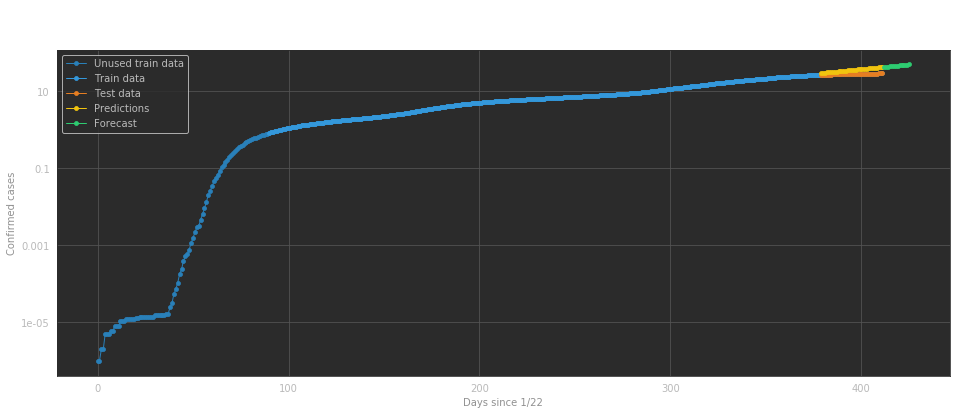

In [31]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=4, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=4, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=4, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=4, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=X_fore, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=4, marker="o",
             sort=False, linewidth=1, color="#2ecc71")

plt.suptitle(f"COVID-19 confirmed cases and forecasting in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])

plt.show()

Now in linear scale we can see corretly the evolution and forecast of COVID-19 confirmed cases.

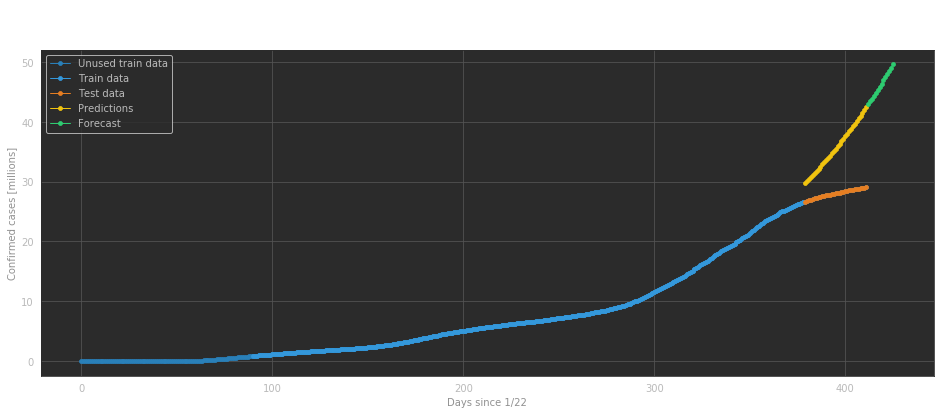

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=4, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=4, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=4, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=4, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=X_fore, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=4, marker="o",
             sort=False, linewidth=1, color="#2ecc71")

plt.suptitle(f"COVID-19 confirmed cases and forecasting in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases [millions]')
plt.xlabel('Days since 1/22')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])
plt.savefig('reg.svg', format='svg', dpi=1200)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)